In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

from utils import *


# Load data
(quadricoptere dataset)

In [2]:
# read csvs for train/val/test + lourd 
flights = read_complete("/home/burgunder/WINGS/Datasets/Fairness/split_quad/ds quad")

flights

val.csv
train.csv
test.csv
lourd.csv


,time_start,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,route,power,power_smoothed
index,,,,,,,,,,,,,,,,,,,,,
112,2019-04-07 10:13:00,1,0.00,1.4,37.0,24.178350,0.389637,-79.782396,40.458047,270.407091,...,-0.000479,0.033248,-0.114812,-9.824341,4,0,25,R5,9.420778,9.420778
113,2019-04-07 10:13:00,1,0.21,1.4,36.0,23.517269,6.154673,-79.782396,40.458047,270.432353,...,0.011397,0.042173,-0.108319,-9.837841,4,0,25,R5,144.741104,144.741104
114,2019-04-07 10:13:00,1,0.31,1.4,42.0,24.109488,1.025779,-79.782396,40.458047,270.433609,...,0.017794,0.005411,-0.188141,-9.812851,4,0,25,R5,24.731003,24.731003
115,2019-04-07 10:13:00,1,0.50,1.4,42.0,24.189619,0.278312,-79.782396,40.458047,270.459037,...,-0.005043,0.034055,-0.114786,-9.808225,4,0,25,R5,6.732263,6.732263
116,2019-04-07 10:13:00,1,0.61,1.3,41.0,24.192123,0.389637,-79.782396,40.458047,270.460150,...,-0.012929,0.008335,-0.094107,-9.812603,4,0,25,R5,9.426145,9.426145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257756,2019-10-24 10:10:00,279,116.11,2.6,180.0,22.400438,3.276131,-79.782783,40.459020,270.146941,...,0.004261,0.451632,-0.372928,-9.812629,10,0,25-50-100-25,R7,73.386768,73.386768
257757,2019-10-24 10:10:00,279,116.30,2.6,180.0,22.379154,3.673720,-79.782783,40.459020,270.168574,...,0.044291,0.421674,-0.361034,-9.817332,10,0,25-50-100-25,R7,82.214738,82.214738
257758,2019-10-24 10:10:00,279,116.40,2.8,181.0,22.379154,3.824803,-79.782783,40.459020,270.164794,...,-0.005242,0.411875,-0.279831,-9.797699,10,0,25-50-100-25,R7,85.595864,85.595864


In [3]:
datasets = read_split_csv("/home/burgunder/WINGS/Datasets/Fairness/split_quad/ds quad")

val.csv
train.csv
test.csv
lourd.csv


# Distributions

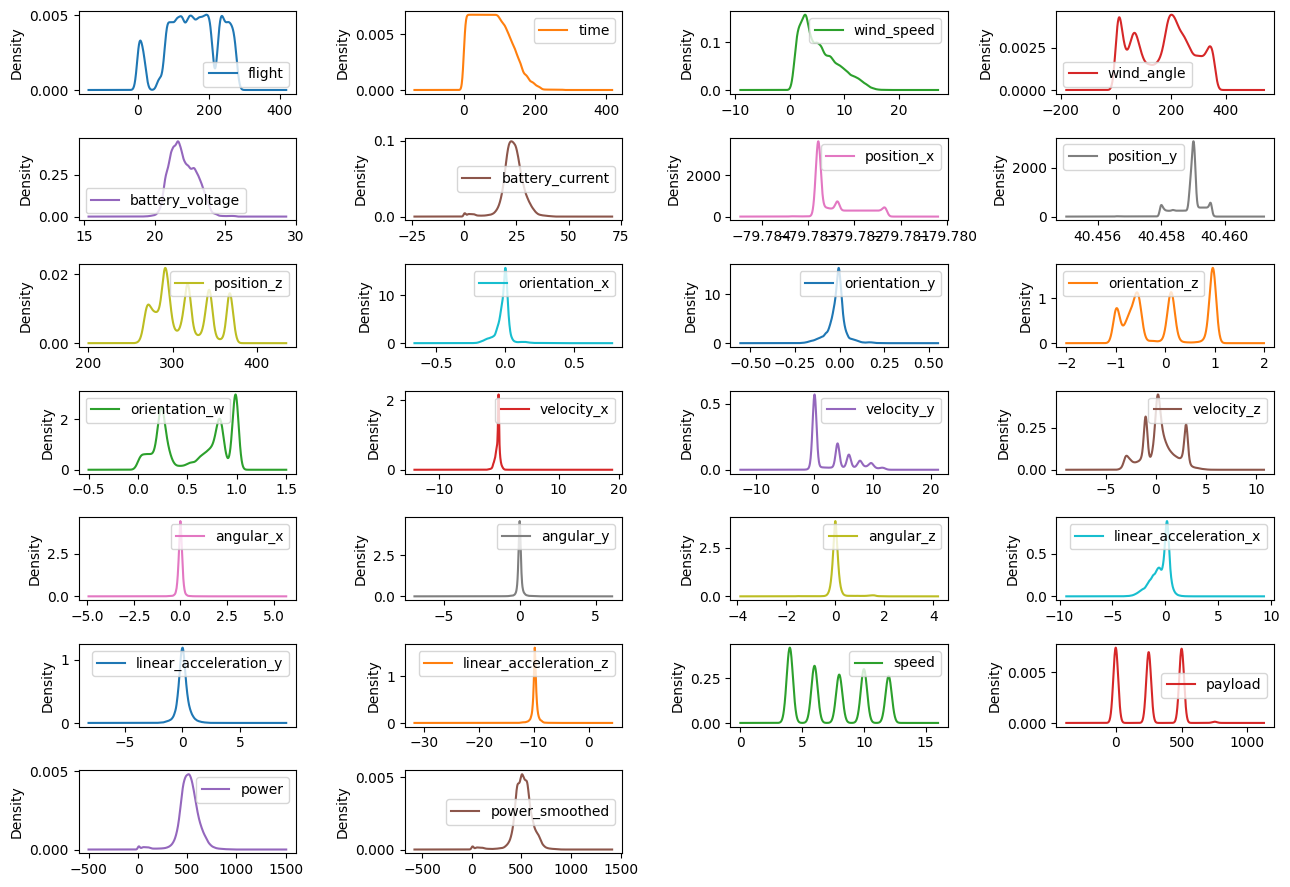

In [9]:
flights.plot(figsize=(13,10), kind="density", subplots=True, layout=[8,4], sharex=False)
plt.tight_layout()
plt.show()

In [ ]:
flights_type = flights.copy()
for t in datasets.keys():
    flights_type.loc[datasets[t].index, "type"] = t
flights_type

,time_start,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,...,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,route,power,power_smoothed,type
index,,,,,,,,,,,,,,,,,,,,,
112,2019-04-07 10:13:00,1,0.00,1.4,37.0,24.178350,0.389637,-79.782396,40.458047,270.407091,...,0.033248,-0.114812,-9.824341,4,0,25,R5,9.420778,9.420778,train
113,2019-04-07 10:13:00,1,0.21,1.4,36.0,23.517269,6.154673,-79.782396,40.458047,270.432353,...,0.042173,-0.108319,-9.837841,4,0,25,R5,144.741104,144.741104,train
114,2019-04-07 10:13:00,1,0.31,1.4,42.0,24.109488,1.025779,-79.782396,40.458047,270.433609,...,0.005411,-0.188141,-9.812851,4,0,25,R5,24.731003,24.731003,train
115,2019-04-07 10:13:00,1,0.50,1.4,42.0,24.189619,0.278312,-79.782396,40.458047,270.459037,...,0.034055,-0.114786,-9.808225,4,0,25,R5,6.732263,6.732263,train
116,2019-04-07 10:13:00,1,0.61,1.3,41.0,24.192123,0.389637,-79.782396,40.458047,270.460150,...,0.008335,-0.094107,-9.812603,4,0,25,R5,9.426145,9.426145,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257756,2019-10-24 10:10:00,279,116.11,2.6,180.0,22.400438,3.276131,-79.782783,40.459020,270.146941,...,0.451632,-0.372928,-9.812629,10,0,25-50-100-25,R7,73.386768,73.386768,val
257757,2019-10-24 10:10:00,279,116.30,2.6,180.0,22.379154,3.673720,-79.782783,40.459020,270.168574,...,0.421674,-0.361034,-9.817332,10,0,25-50-100-25,R7,82.214738,82.214738,train
257758,2019-10-24 10:10:00,279,116.40,2.8,181.0,22.379154,3.824803,-79.782783,40.459020,270.164794,...,0.411875,-0.279831,-9.797699,10,0,25-50-100-25,R7,85.595864,85.595864,train


In [ ]:
len(flights_type.select_dtypes(["float", "int"]).columns)

26

train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
train
val
test


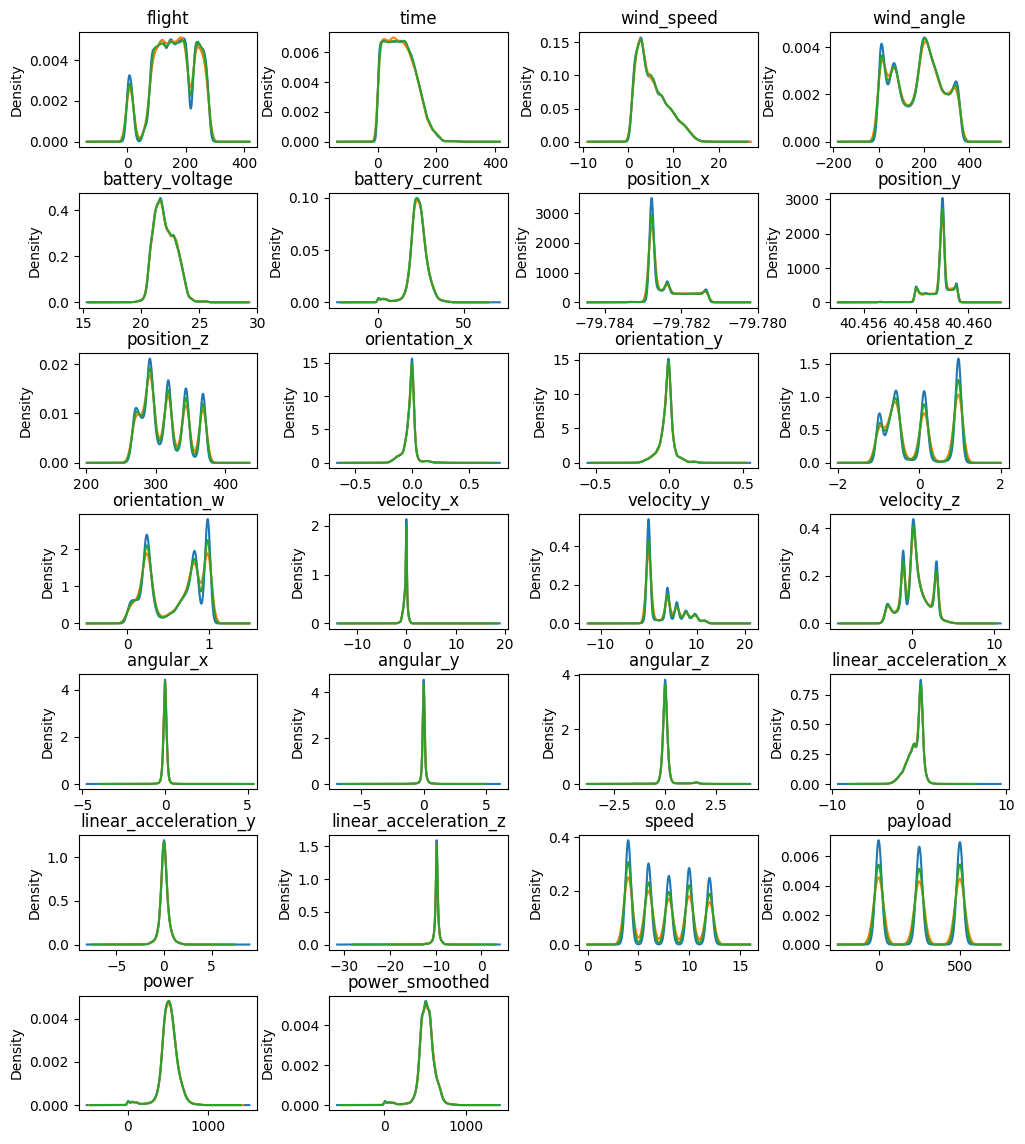

In [ ]:
get_density_plots_matrix(data=flights_type,
                         types_under_study=["train", "val", "test"],
                         features_under_study=flights_type.select_dtypes(["float", "int"]).columns,
                         num_rows = 7, num_cols = 4)

# Relations entre variables

## Matrice de corrélations

- le drone ralentit en Vz au cours de la sessions de vol (vitesse diminue quand temps de vol augmente)
- la vitesse du vent qui augmente :
    - fait augmenter la consommation de courant et diminuer la tension (car puissance reste la même ?) 
    - la pos en z augmente aussi 
    - la Vy augmente (forte corrélation)
    - l'accélération en x diminue (forte corrélation)
- angle du vent un peu corrélé avec les orientations du drone : x/z pos et y/w nég
- tension de la batterie augmente :
    - courant diminue (puissance reste la même)
    - position x augmente, y et z diminuent 
- courant de la batterie : pareil mais l'opposé
- position en x très corrélée négativement avec y et z (un peu moins z)
- orientation_x :
    - pas corrélée aux autres orientations
    - corrélée négativement à Vy, Vz
    - corrélée positivement à accélération en x
- orientation en y et w a des corr plus légères que les autres
- orientation w corrélée avec différentes variables que x, y, z
- orientation_z augmente :
    - Vy augmente
    - accélération_x diminue 
- Vx augmente :
    - Vy diminue 
    - Ax augmente
- Vy :
    - tres fortement corrélée négativement avec A_x
    - corrélée positivement avec Vz
- les vitesses angulaires ne sont pas très corrélées au reste 
- les paramètres fixes comme la payload, la vitesse sont seulement un peu corrélées avec la position du drone (neg avec x et pos avec y et z)

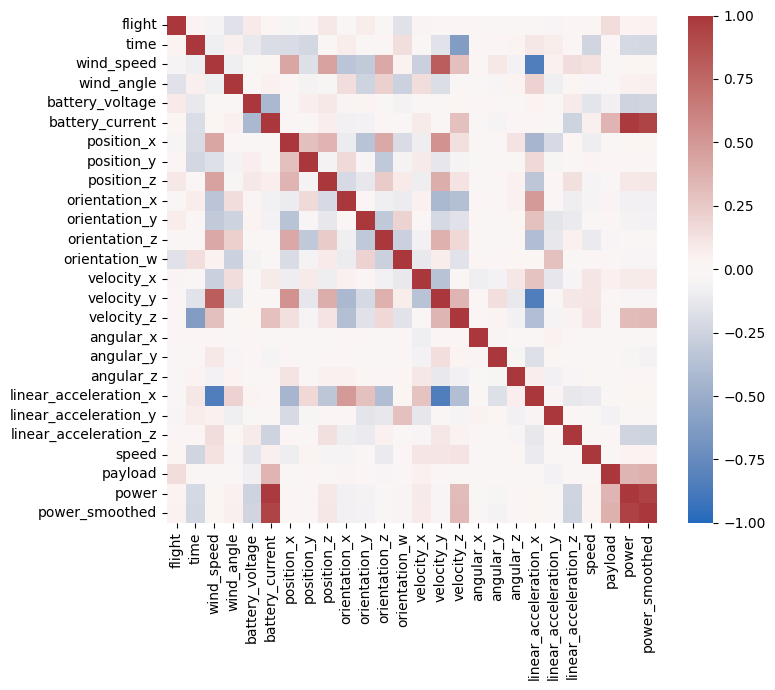

In [10]:
def plot_corr_matrix(df):
    plt.figure(figsize=(8,7))
    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, vmin=-1, vmax=1, cmap="vlag", annot=False)
    plt.tight_layout()
    plt.show()

plot_corr_matrix(flights)

(26, 26)
(25, 4)


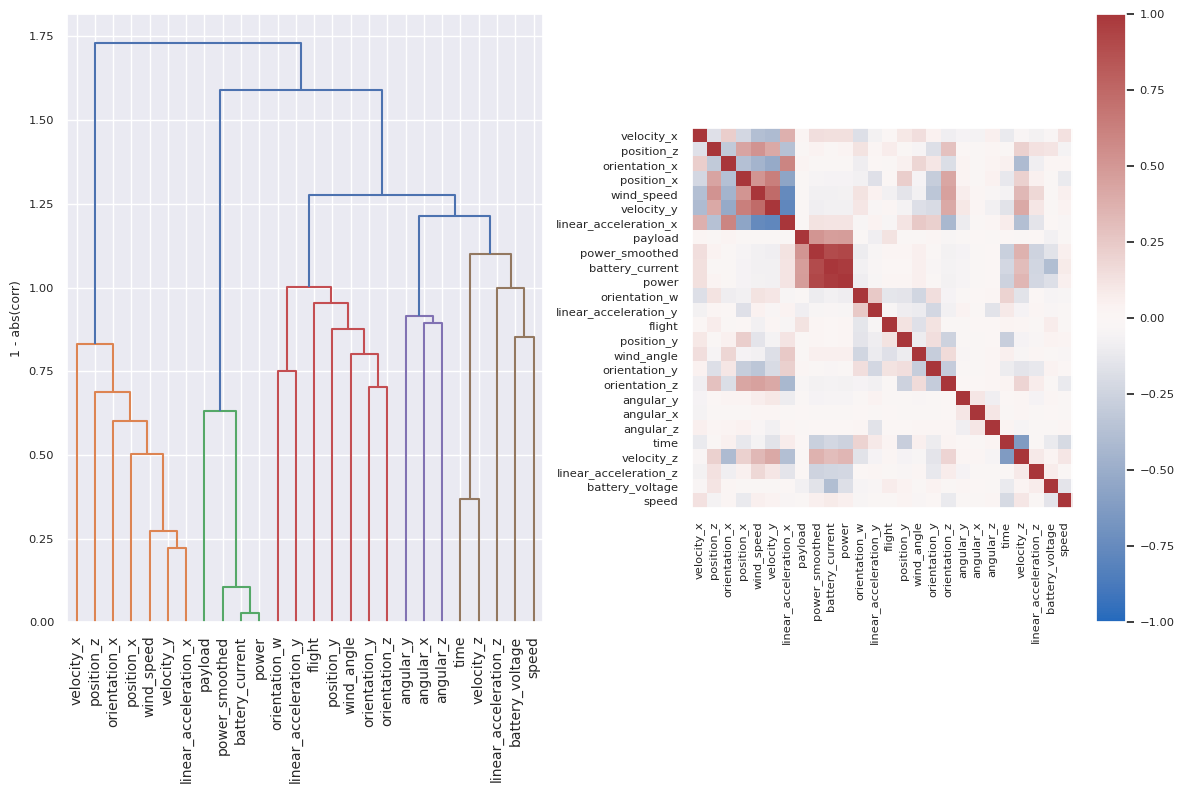

In [37]:
def hierarchy_corr(X, method="spearman"):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
    corr = X.corr(method=method, numeric_only=True).values

    # We convert the correlation matrix to a distance matrix before performing
    # hierarchical clustering using Ward's linkage.
    distance_matrix = 1 - np.abs(corr)
    print(distance_matrix.shape)
    dist_linkage = hierarchy.ward(squareform(distance_matrix))
    print(dist_linkage.shape)
    dendro = hierarchy.dendrogram(dist_linkage, labels=X.select_dtypes(["float", 'int']).columns.tolist(), ax=ax1, leaf_rotation=90)
    dendro_idx = np.arange(0, len(dendro["ivl"]))
    ax1.set(ylabel="1 - abs(corr)")

    im = ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]], vmin=-1, vmax=1, cmap="vlag")
    ax2.set_xticks(dendro_idx)
    ax2.set_yticks(dendro_idx)
    ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
    ax2.set_yticklabels(dendro["ivl"])
    ax2.grid(False)
    plt.colorbar(im, )
    fig.tight_layout()
    plt.show()

hierarchy_corr(flights)

## En fct d'un paramètre fixe

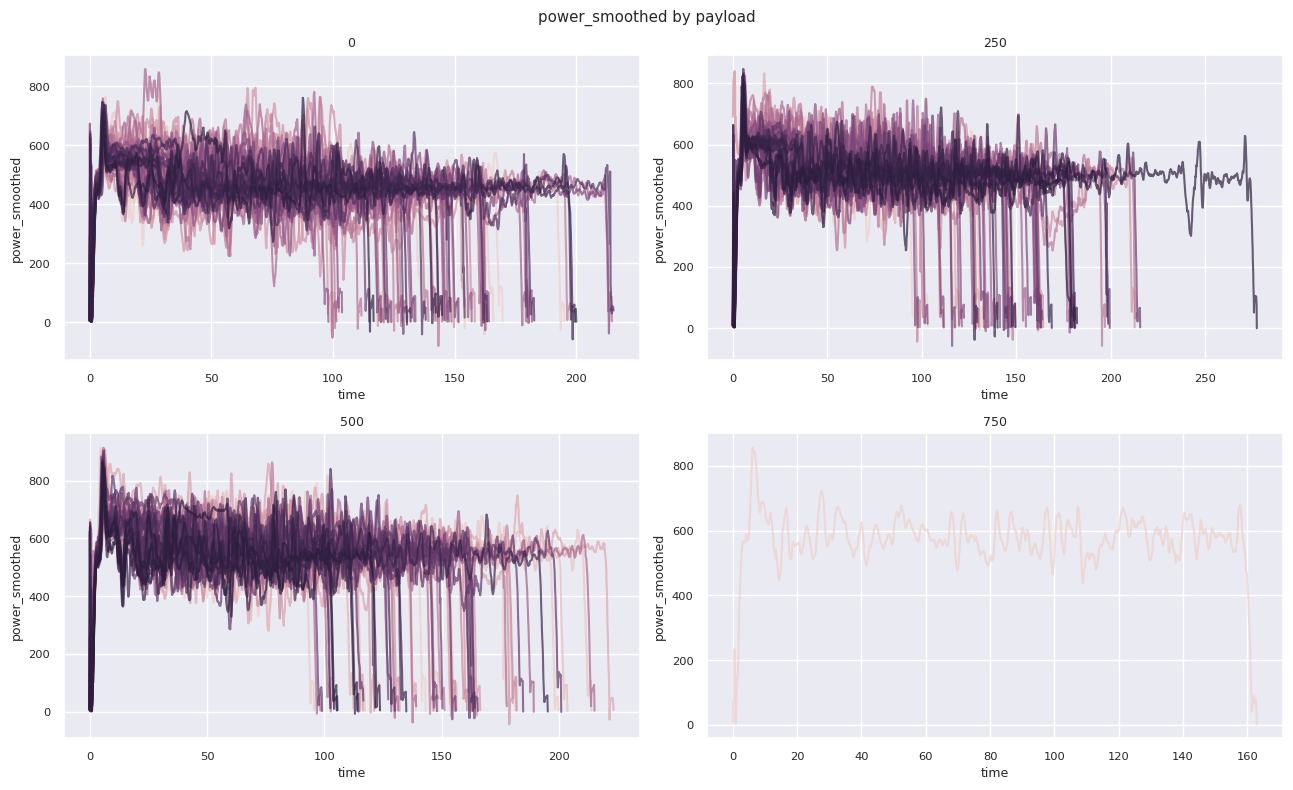

In [18]:
def plot_timeserie_gb(df, f_gb, f, n_cols=3, hue=None):
    """Plot time series of variable f. One plot per groupe (by f_gb). Colored by hue"""
    gb = df.groupby(f_gb)
    ng = len(gb.groups)
    n_rows = int(np.ceil(ng / n_cols, casting='no'))
    i = 1
    sns.set(font_scale=0.75)
    plt.figure(figsize=(13,8))
    plt.suptitle(f + " by " + f_gb)        
    # trouver nombre de groupes et automatiser les subplots
    for n, g in gb:
        plt.subplot(n_rows, n_cols, i)
        sns.lineplot(g, x="time", y=f, hue=hue, legend=False, alpha=0.7)
        plt.title(n)
        i += 1
    plt.tight_layout()
    plt.show()

plot_timeserie_gb(flights, "payload", "power_smoothed", hue="flight", n_cols=2)

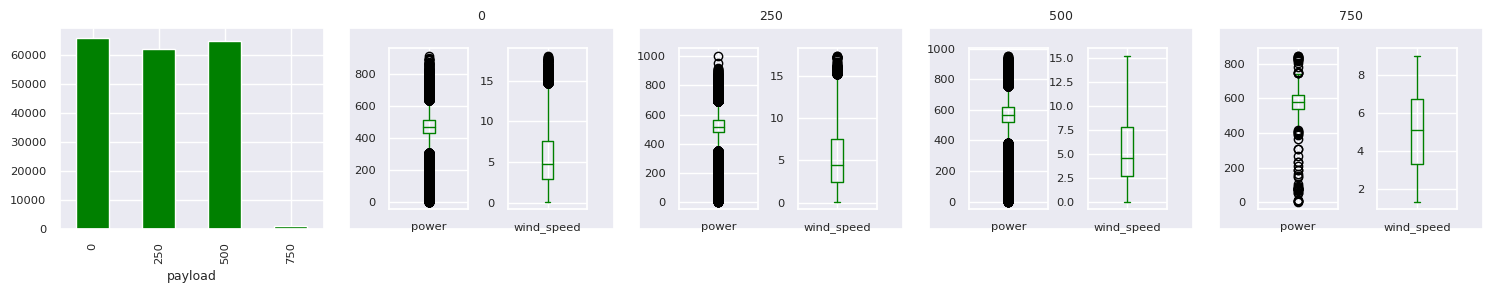

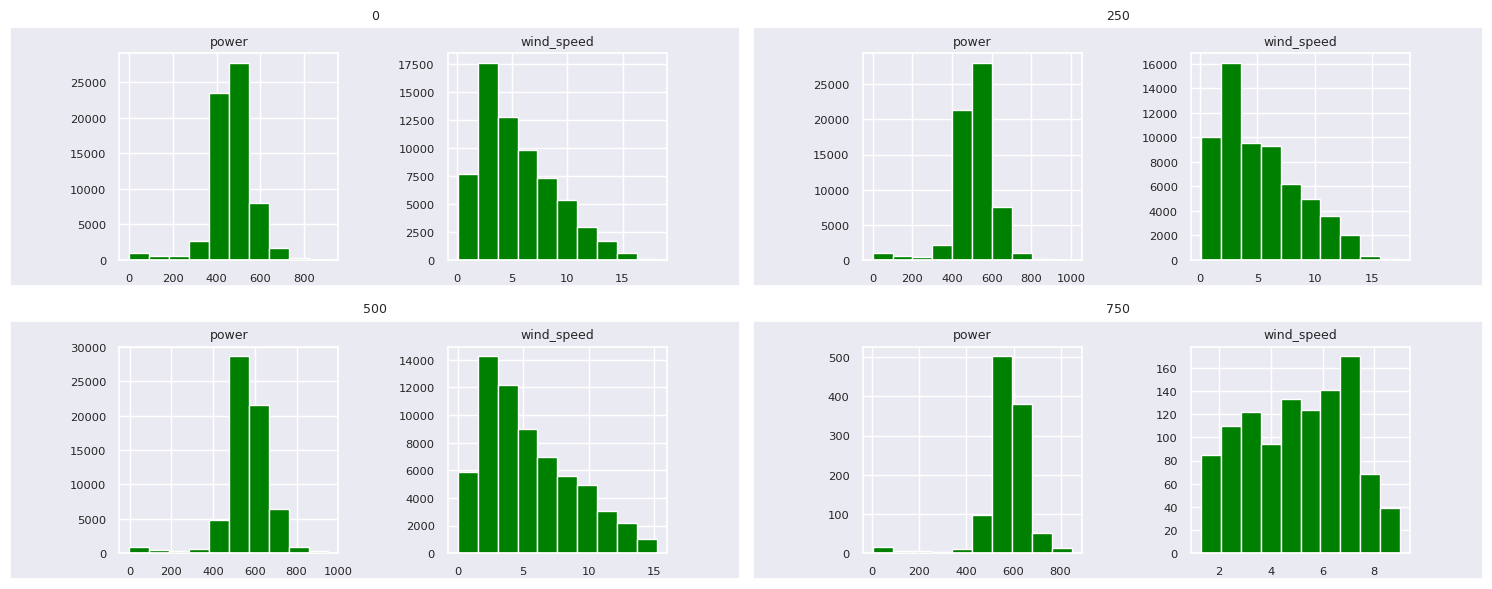

In [15]:
def create_subplots(nbrows, nbcols, figsize, nbplots=None):
    _, axs = plt.subplots(nbrows, nbcols, figsize=figsize)
    if nbplots is not None :    
        diff = nbrows * nbcols - nbplots
        if diff > 0 :
            for i in range(diff) :
                axs.flatten()[-1].remove()
    return axs

def plot_groupby(df, f, layout, columns, color="blue"):
    """ must be only 2 columns to plot 
        layout pour les histogrammes, on met toujours les boxplots en ligne de l[0]*l[1]
    """
    axs = create_subplots(1, layout[0]*layout[1]+1, (15,3), len(df[f].unique())+1)
    # histogramme de la colonne qui fera le groupby
    df.groupby(f).size().plot.bar(color=color, ax=axs[0])
    # boxplots
    i = 1
    for n, g in df.groupby(f):
        axs[i].set(title=n, xticks=[], yticks=[])
        sub_axes = [axs[i].inset_axes([0.15, 0.1, 0.3, 0.8]), axs[i].inset_axes([0.6, 0.1, 0.3, 0.8])]
        g.boxplot(ax=sub_axes[0], column=columns[0], color=color)
        g.boxplot(ax=sub_axes[1], column=columns[1], color=color)
        i += 1
    plt.tight_layout()
    # histogrammes
    axs = create_subplots(layout[0], layout[1], (15, 3*layout[0]), len(df[f].unique()))
    i = 0
    for n, g in df.groupby(f):
        ax = axs[i//layout[1], i%layout[1]]
        ax.set(title=n, xticks=[], yticks=[])
        sub_axes = [ax.inset_axes([0.15, 0.1, 0.3, 0.8]), ax.inset_axes([0.6, 0.1, 0.3, 0.8])]
        g.hist(ax=sub_axes[0], column=columns[0], color=color)
        g.hist(ax=sub_axes[1], column=columns[1], color=color)
        i += 1
    plt.tight_layout()
    plt.show()

cols = ["power", "wind_speed"]
plot_groupby(flights, "payload", (2,2), cols, "green")

In [ ]:
violin_plot(x=flights["power_smoothed"], y=flights["payload"], xlabel="Power (W)")